In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
ds = pd.read_csv('./movies_prerelease.csv')

In [3]:
ds

,Movie,Target,Budget,BoxOffice,Rating,Votes,Year,"rat_(0, 2]","rat_(2, 4]","rat_(4, 6]",...,s_Zakir Hussain,s_Zareen Khan,s_Zarina Wahab,s_Zayed Khan,s_Zeenat Aman,s_Zenia Starr,s_Zenobia Shroff,s_Zohra Sehgal,s_Zoya Afroz,s_Zoya Hussain
0,Batti Gul Meter Chalu,2,50.0,37.00,6.3,1552,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dangal,6,90.0,370.00,8.5,105480,2016,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Manmarziyaan,3,30.0,26.00,7.0,1836,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sui Dhaaga: Made in India,5,50.0,79.00,6.9,1342,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Stree,6,25.0,127.00,8.3,7801,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Manto,2,8.0,3.50,7.9,622,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Pataakha,2,20.0,6.50,7.7,392,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3 Idiots,6,55.0,202.00,8.4,282358,2009,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,PK,6,85.0,340.00,8.2,127703,2014,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Padman,5,40.0,81.00,8.1,10917,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
ds['Target'] = ds['Target'].map({1:1, 2:1, 3:1, 4:2, 5:3, 6:3}).astype(int)
data = ds.drop(columns=['Movie', 'Rating', 'Votes', 'rat_(0, 2]', 'rat_(2, 4]', 'rat_(4, 6]',  'rat_(6, 8]', 'rat_(8, 10]'])

In [5]:
print(data.shape)
print(ds.shape)

(986, 1799)
(986, 1807)


In [6]:
data.dtypes

Target                   int32
Budget                 float64
BoxOffice              float64
Year                     int64
g_Action                 int64
g_Adventure              int64
g_Animation              int64
g_Biography              int64
g_Comedy                 int64
g_Crime                  int64
g_Drama                  int64
g_Family                 int64
g_Fantasy                int64
g_History                int64
g_Horror                 int64
g_Music                  int64
g_Musical                int64
g_Mystery                int64
g_Romance                int64
g_Sci-Fi                 int64
g_Sport                  int64
g_Thriller               int64
g_War                    int64
y_2000                   int64
y_2001                   int64
y_2002                   int64
y_2003                   int64
y_2004                   int64
y_2005                   int64
y_2006                   int64
                        ...   
s_Vivek Shah             int64
s_Vrajes

In [7]:
## yearwise split
X_full = data.drop(columns=['Target', 'BoxOffice', 'Year']).values
Y_full = data.Target.values

X_train = data[data.Year != 2018].drop(columns=['Target', 'BoxOffice', 'Year']).values
Y_train = data[data.Year != 2018].Target.values

X_test = data[data.Year == 2018].drop(columns=['Target', 'BoxOffice', 'Year']).values
Y_test = data[data.Year == 2018].Target.values

print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

classes = [1, 2, 3]

(929, 1796) (929,)
(57, 1796) (57,)


In [8]:
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.5263157894736842


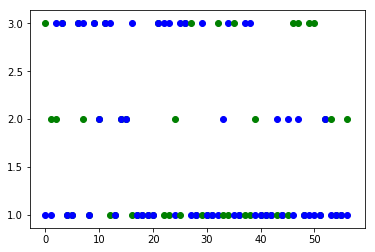

Normalized confusion matrix
[[0.625      0.15625    0.21875   ]
 [0.375      0.5        0.125     ]
 [0.52941176 0.11764706 0.35294118]]


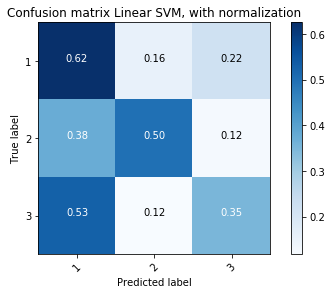

In [9]:
svm_model_linear = svm.SVC(kernel = 'linear', C = 1).fit(X_train, Y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, Y_test)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(Y_test, svm_predictions)

for ix in range(svm_predictions.shape[0]):
    plt.scatter(ix, svm_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=classes, normalize=True, title='Confusion matrix Linear SVM, with normalization')

pickle.dump(svm_model_linear, open('year_svm.pkl', 'wb'))

In [10]:
loaded_model = pickle.load(open('year_svm.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)
result_svm = result

for i in range(X_test.shape[0]):
    print(result[i], Y_test[i], X_test[i][0])

3 1 50.0
2 1 30.0
2 3 50.0
3 3 25.0
1 1 8.0
1 1 20.0
3 3 40.0
2 3 33.0
1 1 7.0
3 3 100.0
2 2 45.0
3 3 37.0
1 3 100.0
1 1 10.0
2 2 90.0
2 2 215.0
1 3 40.0
1 1 17.0
1 1 25.0
1 1 10.0
1 1 15.0
3 3 40.0
1 3 45.0
1 3 50.0
2 1 35.0
1 3 25.0
3 3 17.0
3 1 7.0
1 1 25.0
1 3 40.0
1 1 12.0
1 1 20.0
3 1 28.0
1 2 20.0
1 3 75.0
3 1 30.0
1 1 27.0
1 3 21.0
1 3 20.0
2 1 14.0
1 1 30.0
1 1 7.0
1 1 3.0
1 2 18.0
1 1 30.0
1 2 20.0
3 1 55.0
3 2 30.0
1 1 30.0
3 1 55.0
3 1 13.0
1 1 12.0
2 2 15.0
2 1 20.0
1 1 10.0
1 1 8.0
2 1 10.0


0.3684210526315789


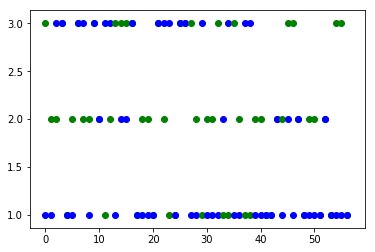

Normalized confusion matrix
[[0.3125     0.4375     0.25      ]
 [0.125      0.5        0.375     ]
 [0.35294118 0.23529412 0.41176471]]


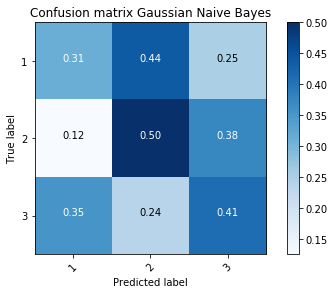

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, Y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy for X_test
accuracy = gnb.score(X_test, Y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(Y_test, gnb_predictions)

for ix in range(gnb_predictions.shape[0]):
    plt.scatter(ix, gnb_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=classes, normalize=True, title='Confusion matrix Gaussian Naive Bayes')

pickle.dump(gnb, open('year_naivebayes.pkl', 'wb'))

In [12]:
loaded_model = pickle.load(open('year_naivebayes.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)
result_naivebayes = result

for i in range(X_test.shape[0]):
    print(result[i], Y_test[i], X_test[i][0])

3 1 50.0
2 1 30.0
2 3 50.0
3 3 25.0
1 1 8.0
2 1 20.0
3 3 40.0
2 3 33.0
2 1 7.0
3 3 100.0
2 2 45.0
1 3 37.0
2 3 100.0
3 1 10.0
3 2 90.0
3 2 215.0
3 3 40.0
1 1 17.0
2 1 25.0
2 1 10.0
1 1 15.0
3 3 40.0
2 3 45.0
1 3 50.0
1 1 35.0
3 3 25.0
3 3 17.0
3 1 7.0
2 1 25.0
1 3 40.0
2 1 12.0
2 1 20.0
3 1 28.0
1 2 20.0
1 3 75.0
3 1 30.0
2 1 27.0
1 3 21.0
1 3 20.0
2 1 14.0
2 1 30.0
1 1 7.0
1 1 3.0
2 2 18.0
2 1 30.0
3 2 20.0
3 1 55.0
2 2 30.0
1 1 30.0
2 1 55.0
2 1 13.0
1 1 12.0
2 2 15.0
1 1 20.0
3 1 10.0
3 1 8.0
1 1 10.0


0.5263157894736842


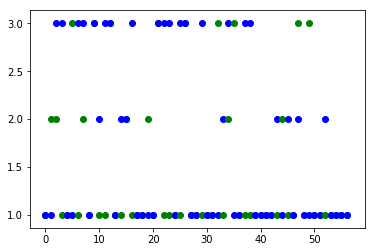

Normalized confusion matrix
[[0.78125    0.09375    0.125     ]
 [0.75       0.125      0.125     ]
 [0.58823529 0.17647059 0.23529412]]


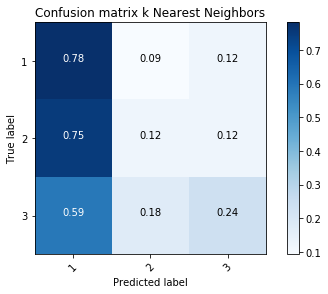

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(Y_test, knn_predictions)

for ix in range(knn_predictions.shape[0]):
    plt.scatter(ix, knn_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=classes, normalize=True, title='Confusion matrix k Nearest Neighbors')

pickle.dump(knn, open('year_knn.pkl', 'wb'))

In [14]:
loaded_model = pickle.load(open('year_knn.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)
result_knn = result

for i in range(X_test.shape[0]):
    print(result[i], Y_test[i], X_test[i][0])

1 1 50.0
2 1 30.0
2 3 50.0
1 3 25.0
1 1 8.0
3 1 20.0
1 3 40.0
2 3 33.0
1 1 7.0
3 3 100.0
1 2 45.0
1 3 37.0
3 3 100.0
1 1 10.0
1 2 90.0
2 2 215.0
1 3 40.0
1 1 17.0
1 1 25.0
2 1 10.0
1 1 15.0
3 3 40.0
1 3 45.0
1 3 50.0
1 1 35.0
1 3 25.0
3 3 17.0
1 1 7.0
1 1 25.0
1 3 40.0
1 1 12.0
1 1 20.0
3 1 28.0
1 2 20.0
2 3 75.0
3 1 30.0
1 1 27.0
1 3 21.0
1 3 20.0
1 1 14.0
1 1 30.0
1 1 7.0
1 1 3.0
1 2 18.0
2 1 30.0
1 2 20.0
1 1 55.0
3 2 30.0
1 1 30.0
3 1 55.0
1 1 13.0
1 1 12.0
1 2 15.0
1 1 20.0
1 1 10.0
1 1 8.0
1 1 10.0


0.5964912280701754


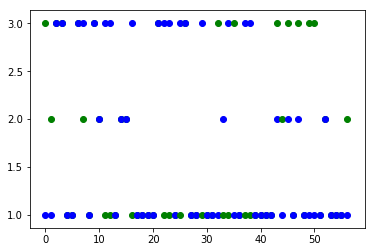

Normalized confusion matrix
[[0.75       0.09375    0.15625   ]
 [0.125      0.5        0.375     ]
 [0.58823529 0.05882353 0.35294118]]


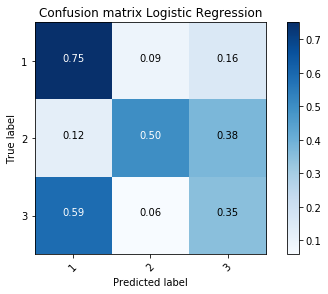

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = lr.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
lr_predictions = lr.predict(X_test) 
cm = confusion_matrix(Y_test, lr_predictions)

for ix in range(lr_predictions.shape[0]):
    plt.scatter(ix, lr_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=classes, normalize=True, title='Confusion matrix Logistic Regression')

pickle.dump(lr, open('year_logreg.pkl', 'wb'))

In [16]:
loaded_model = pickle.load(open('year_logreg.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)
result_logreg = result

for i in range(X_test.shape[0]):
    print(result[i], Y_test[i], X_test[i][0])

3 1 50.0
2 1 30.0
3 3 50.0
3 3 25.0
1 1 8.0
1 1 20.0
3 3 40.0
2 3 33.0
1 1 7.0
3 3 100.0
2 2 45.0
1 3 37.0
1 3 100.0
1 1 10.0
2 2 90.0
2 2 215.0
1 3 40.0
1 1 17.0
1 1 25.0
1 1 10.0
1 1 15.0
3 3 40.0
1 3 45.0
1 3 50.0
1 1 35.0
1 3 25.0
3 3 17.0
1 1 7.0
1 1 25.0
1 3 40.0
1 1 12.0
1 1 20.0
3 1 28.0
1 2 20.0
1 3 75.0
3 1 30.0
1 1 27.0
1 3 21.0
1 3 20.0
1 1 14.0
1 1 30.0
1 1 7.0
1 1 3.0
3 2 18.0
2 1 30.0
3 2 20.0
1 1 55.0
3 2 30.0
1 1 30.0
3 1 55.0
3 1 13.0
1 1 12.0
2 2 15.0
1 1 20.0
1 1 10.0
1 1 8.0
2 1 10.0


0.631578947368421


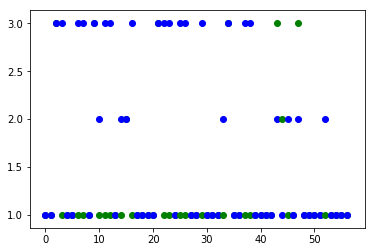

Normalized confusion matrix
[[0.96875    0.03125    0.        ]
 [0.625      0.125      0.25      ]
 [0.76470588 0.         0.23529412]]


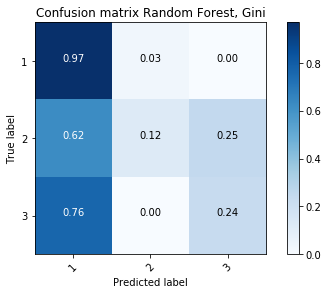

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, warm_start=True).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = rf.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
rf_predictions = rf.predict(X_test) 
cm = confusion_matrix(Y_test, rf_predictions)

for ix in range(rf_predictions.shape[0]):
    plt.scatter(ix, rf_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=classes, normalize=True, title='Confusion matrix Random Forest, Gini')

pickle.dump(rf, open('year_randfor.pkl', 'wb'))

In [18]:
loaded_model = pickle.load(open('year_randfor.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)
result_randfor = result

for i in range(X_test.shape[0]):
    print(result[i], Y_test[i], X_test[i][0])

1 1 50.0
1 1 30.0
3 3 50.0
1 3 25.0
1 1 8.0
1 1 20.0
1 3 40.0
1 3 33.0
1 1 7.0
3 3 100.0
1 2 45.0
1 3 37.0
1 3 100.0
1 1 10.0
1 2 90.0
2 2 215.0
1 3 40.0
1 1 17.0
1 1 25.0
1 1 10.0
1 1 15.0
3 3 40.0
1 3 45.0
1 3 50.0
1 1 35.0
1 3 25.0
1 3 17.0
1 1 7.0
1 1 25.0
1 3 40.0
1 1 12.0
1 1 20.0
1 1 28.0
1 2 20.0
3 3 75.0
1 1 30.0
1 1 27.0
1 3 21.0
1 3 20.0
1 1 14.0
1 1 30.0
1 1 7.0
1 1 3.0
3 2 18.0
2 1 30.0
1 2 20.0
1 1 55.0
3 2 30.0
1 1 30.0
1 1 55.0
1 1 13.0
1 1 12.0
1 2 15.0
1 1 20.0
1 1 10.0
1 1 8.0
1 1 10.0


0.6140350877192983


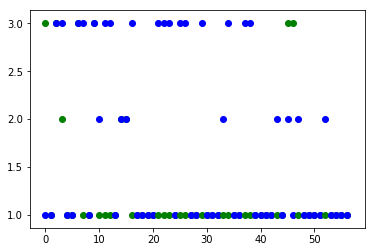

Normalized confusion matrix
[[0.9375     0.         0.0625    ]
 [0.625      0.25       0.125     ]
 [0.76470588 0.05882353 0.17647059]]


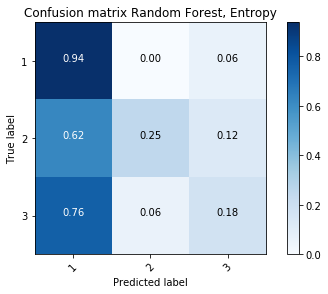

In [19]:
rf = RandomForestClassifier(n_estimators=20, criterion='entropy', warm_start=True).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = rf.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
rf_predictions = rf.predict(X_test) 
cm = confusion_matrix(Y_test, rf_predictions)

for ix in range(rf_predictions.shape[0]):
    plt.scatter(ix, rf_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=classes, normalize=True, title='Confusion matrix Random Forest, Entropy')

pickle.dump(rf, open('year_randfor2.pkl', 'wb'))

In [20]:
loaded_model = pickle.load(open('year_randfor2.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)
result_randfor2 = result

for i in range(X_test.shape[0]):
    print(result[i], Y_test[i], X_test[i][0])

3 1 50.0
1 1 30.0
3 3 50.0
2 3 25.0
1 1 8.0
1 1 20.0
3 3 40.0
1 3 33.0
1 1 7.0
3 3 100.0
1 2 45.0
1 3 37.0
1 3 100.0
1 1 10.0
2 2 90.0
2 2 215.0
1 3 40.0
1 1 17.0
1 1 25.0
1 1 10.0
1 1 15.0
1 3 40.0
1 3 45.0
1 3 50.0
1 1 35.0
1 3 25.0
1 3 17.0
1 1 7.0
1 1 25.0
1 3 40.0
1 1 12.0
1 1 20.0
1 1 28.0
1 2 20.0
1 3 75.0
1 1 30.0
1 1 27.0
1 3 21.0
1 3 20.0
1 1 14.0
1 1 30.0
1 1 7.0
1 1 3.0
1 2 18.0
1 1 30.0
3 2 20.0
3 1 55.0
1 2 30.0
1 1 30.0
1 1 55.0
1 1 13.0
1 1 12.0
1 2 15.0
1 1 20.0
1 1 10.0
1 1 8.0
1 1 10.0


In [21]:
from sklearn.tree import DecisionTreeClassifier

0.5614035087719298


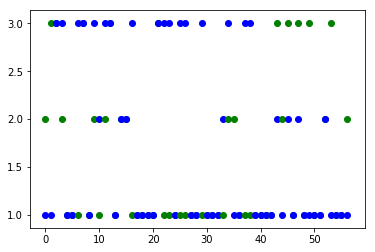

Normalized confusion matrix
[[0.78125    0.125      0.09375   ]
 [0.25       0.375      0.375     ]
 [0.52941176 0.23529412 0.23529412]]


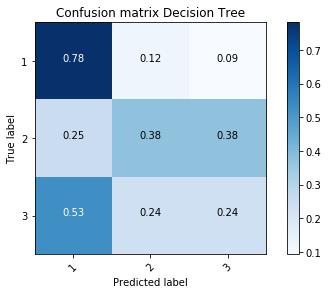

In [22]:
dt = DecisionTreeClassifier().fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = dt.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
dt_predictions = dt.predict(X_test) 
cm = confusion_matrix(Y_test, dt_predictions)

for ix in range(dt_predictions.shape[0]):
    plt.scatter(ix, dt_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=classes, normalize=True, title='Confusion matrix Decision Tree')

pickle.dump(rf, open('year_dt.pkl', 'wb'))

In [23]:
loaded_model = pickle.load(open('year_dt.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)
result_dt = result

for i in range(X_test.shape[0]):
    print(result[i], Y_test[i], X_test[i][0])

3 1 50.0
1 1 30.0
3 3 50.0
2 3 25.0
1 1 8.0
1 1 20.0
3 3 40.0
1 3 33.0
1 1 7.0
3 3 100.0
1 2 45.0
1 3 37.0
1 3 100.0
1 1 10.0
2 2 90.0
2 2 215.0
1 3 40.0
1 1 17.0
1 1 25.0
1 1 10.0
1 1 15.0
1 3 40.0
1 3 45.0
1 3 50.0
1 1 35.0
1 3 25.0
1 3 17.0
1 1 7.0
1 1 25.0
1 3 40.0
1 1 12.0
1 1 20.0
1 1 28.0
1 2 20.0
1 3 75.0
1 1 30.0
1 1 27.0
1 3 21.0
1 3 20.0
1 1 14.0
1 1 30.0
1 1 7.0
1 1 3.0
1 2 18.0
1 1 30.0
3 2 20.0
3 1 55.0
1 2 30.0
1 1 30.0
1 1 55.0
1 1 13.0
1 1 12.0
1 2 15.0
1 1 20.0
1 1 10.0
1 1 8.0
1 1 10.0


In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
data2 = ds[['BoxOffice','Target','Budget','Year']]
#data2 = ds[['BoxOffice','Target','Budget','y_2000','y_2001','y_2002','y_2003','y_2004','y_2005','y_2006','y_2007','y_2008','y_2009','y_2010','y_2011','y_2012','y_2013','y_2014','y_2015','y_2016','y_2017','y_2018']]
#data = ds.drop(columns=['Movie', 'BoxOffice', 'Rating', 'Votes', 'Year']).values
print(data2.shape)

(986, 4)


In [68]:
## yearwise split
X_train2 = data2[data2.Year != 2018].drop(columns=['BoxOffice']).values
Y_train2 = data2[data2.Year != 2018].BoxOffice.values + 26

X_test2 = data2[data2.Year == 2018].drop(columns=['BoxOffice']).values
Y_test2 = data2[data2.Year == 2018].BoxOffice.values + 26

print (X_train2.shape, Y_train2.shape)
print (X_test2.shape, Y_test2.shape)

(929, 3) (929,)
(57, 3) (57,)


In [69]:
lm = LinearRegression()
lm.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
lm.score(X_test2, Y_test2)

0.8051012936211462

In [71]:
y_pred2 = lm.predict(X_test2)
print(y_pred2.shape)
for i in range(y_pred2.shape[0]):
    print(y_pred2[i], Y_test2[i], X_test2[i])

(57,)
77.29583252711603 63.0 [1.000e+00 5.000e+01 2.018e+03]
49.40850553783012 52.0 [1.000e+00 3.000e+01 2.018e+03]
117.72638493573794 105.0 [   3.   50. 2018.]
82.86722619913054 153.0 [   3.   25. 2018.]
18.73244584961563 29.5 [1.000e+00 8.000e+00 2.018e+03]
35.46484204318719 32.5 [1.000e+00 2.000e+01 2.018e+03]
103.78272144109498 107.0 [   3.   40. 2018.]
94.0221569948449 76.0 [   3.   33. 2018.]
17.338079500151338 30.0 [1.000e+00 7.000e+00 2.018e+03]
187.4447024089527 368.0 [   3.  100. 2018.]
90.5392769841055 92.0 [2.000e+00 4.500e+01 2.018e+03]
99.59962239270209 149.8 [   3.   37. 2018.]
187.4447024089527 201.0 [   3.  100. 2018.]
21.521178548544214 27.75 [1.000e+00 1.000e+01 2.018e+03]
153.2857627099988 131.0 [2.000e+00 9.000e+01 2.018e+03]
327.5815563930357 328.0 [2.000e+00 2.150e+02 2.018e+03]
103.78272144109498 100.0 [   3.   40. 2018.]
31.281742994794286 28.0 [1.000e+00 1.700e+01 2.018e+03]
42.43667379050865 34.0 [1.000e+00 2.500e+01 2.018e+03]
21.521178548544214 29.0 [1.000e

In [72]:
pickle.dump(lm, open('year_lm.pkl', 'wb'))

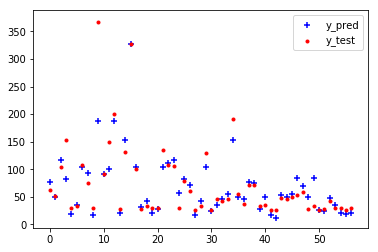

In [73]:
y = range(y_pred2.shape[0])
plt.scatter(y, y_pred2, c='b', marker='+')
plt.scatter(y, Y_test2, c='r', marker='.')
labels = ['y_pred', 'y_test']
plt.legend(labels)

In [74]:
loaded_model = pickle.load(open('year_svm.pkl', 'rb'))
type(loaded_model)
result_svm = loaded_model.predict(X_full)

loaded_model = pickle.load(open('year_naivebayes.pkl', 'rb'))
type(loaded_model)
result_naivebayes = loaded_model.predict(X_full)

loaded_model = pickle.load(open('year_knn.pkl', 'rb'))
type(loaded_model)
result_knn = loaded_model.predict(X_full)

loaded_model = pickle.load(open('year_logreg.pkl', 'rb'))
type(loaded_model)
result_logreg = loaded_model.predict(X_full)

loaded_model = pickle.load(open('year_randfor.pkl', 'rb'))
type(loaded_model)
result_randfor = loaded_model.predict(X_full)

loaded_model = pickle.load(open('year_randfor2.pkl', 'rb'))
type(loaded_model)
result_randfor2 = loaded_model.predict(X_full)

loaded_model = pickle.load(open('year_dt.pkl', 'rb'))
type(loaded_model)
result_dt = loaded_model.predict(X_full)

pandas.core.series.Series

In [96]:
data3 = pd.DataFrame({'BoxOffice': ds.BoxOffice,
                   'Budget': ds.Budget,
                   'Year': ds.Year,
                   'M1': result_svm,
                   'M2': result_naivebayes,
                   'M3': result_knn,
                   'M4': result_logreg,
                   'M5': result_dt,
                   })

In [97]:
#data3 = ds[['BoxOffice','Budget','Year']]
#data3['M1'] = pd.Series(result_svm)
#data3['M2'] = pd.Series(result_naivebayes)
#data3['M3'] = pd.Series(result_knn)
#data3['M4'] = pd.Series(result_logreg)
#data3['M5'] = result_randfor
#data3['M6'] = result_randfor2
#data3['M5'] = pd.Series(result_dt)
print(data3.shape)

(986, 8)


In [98]:
## yearwise split
X_train3 = data3[data3.Year != 2018].drop(columns=['BoxOffice', 'Year']).values
Y_train3 = data3[data3.Year != 2018].BoxOffice.values + 26

X_test3 = data3[data3.Year == 2018].drop(columns=['BoxOffice', 'Year']).values
Y_test3 = data3[data3.Year == 2018].BoxOffice.values + 26

print (X_train3.shape, Y_train3.shape)
print (X_test3.shape, Y_test3.shape)

(929, 6) (929,)
(57, 6) (57,)


In [99]:
print(X_train3[0].shape, X_train3[0])

(6,) [90.  3.  3.  1.  3.  3.]


In [100]:
lm2 = LinearRegression()
lm2.fit(X_train3, Y_train3)

print(lm2.score(X_test3, Y_test3))
print(lm2.coef_)

0.6726736637389532
[ 1.37861687  7.28425306 -1.07900928  0.36731349  0.95737867 13.13869626]


In [101]:
print(X_test3[0].shape)
print(X_test3[0])
print(type(X_test3))

(6,)
[50.  3.  3.  1.  3.  3.]
<class 'numpy.ndarray'>


In [103]:
y_pred3 = lm2.predict(X_test3)
print(y_pred3.shape)
for i in range(y_pred3.shape[0]):
    print(y_pred3[i], Y_test3[i], X_test3[i], np.round(np.average(X_test3[i])))

(57,)
118.70033191213986 63.0 [50.  3.  3.  1.  3.  3.] 10.0
58.05529296171118 52.0 [30.  2.  2.  2.  2.  1.] 6.0
112.86240161909245 105.0 [50.  2.  2.  2.  3.  3.] 10.0
71.0962138270298 153.0 [25.  3.  3.  1.  3.  2.] 6.0
20.195785813975043 29.5 [8. 1. 1. 1. 1. 1.] 2.0
36.394805987564 32.5 [20.  1.  2.  3.  1.  1.] 5.0
104.91416318379635 107.0 [40.  3.  3.  1.  3.  3.] 9.0
62.191143580214224 76.0 [33.  2.  2.  2.  2.  1.] 7.0
17.738159660576137 30.0 [7. 1. 2. 1. 1. 1.] 2.0
188.36580253399873 368.0 [100.   3.   3.   3.   3.   3.] 19.0
78.36723256415578 92.0 [45.  2.  2.  1.  2.  1.] 9.0
74.74418125353642 149.8 [37.  3.  1.  1.  1.  1.] 7.0
146.68415581431208 201.0 [100.   1.   2.   3.   1.   1.] 18.0
20.795000998514638 27.75 [10.  1.  3.  1.  1.  1.] 3.0
152.46467882538835 131.0 [90.  2.  3.  1.  2.  2.] 17.0
325.15910141975286 328.0 [215.   2.   3.   2.   2.   2.] 38.0
62.153507183545166 100.0 [40.  1.  3.  1.  1.  1.] 8.0
32.603337669484205 28.0 [17.  1.  1.  1.  1.  1.] 4.0
42.55326

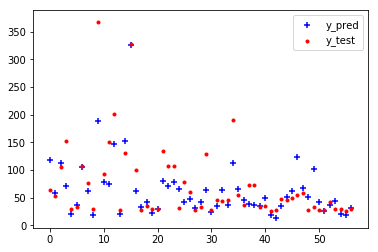

In [104]:
pickle.dump(lm, open('year_lm2.pkl', 'wb'))

y = range(y_pred3.shape[0])
plt.scatter(y, y_pred3, c='b', marker='+')
plt.scatter(y, Y_test3, c='r', marker='.')
labels = ['y_pred', 'y_test']
plt.legend(labels)

In [105]:
final_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote,  year, df_rating, df_genre, df_year, df_runtime, df_dir, df_star], axis=1)

NameError: name 'movie' is not defined

In [29]:
final_df.to_csv('movies_prerelease_full.csv', encoding='utf-8', index=False)

In [31]:
year_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote,  year, df_year], axis=1)
year_df.to_csv('movies_prerelease_year.csv', encoding='utf-8', index=False)

In [34]:
genre_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote, df_genre], axis=1)
genre_df.to_csv('movies_prerelease_genre.csv', encoding='utf-8', index=False)

In [35]:
yeargenre_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote, year, df_year, df_genre], axis=1)
yeargenre_df.to_csv('movies_prerelease_yeargenre.csv', encoding='utf-8', index=False)

In [36]:
final2_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote, df_dir, df_star], axis=1)
final2_df.to_csv('movies_prerelease_fullcast.csv', encoding='utf-8', index=False)

In [107]:
loaded_model = pickle.load(open('year_lm2.pkl', 'rb'))
type(loaded_model)
a=np.zeros((6,))
a[0]=50
a[1]=3
a[2]=3
a[3]=1
a[4]=3
a[5]=3
b = np.reshape(a, (-1, 6))
print(loaded_model.predict(b))

ValueError: shapes (1,6) and (3,) not aligned: 6 (dim 1) != 3 (dim 0)

In [ ]:
a = np.reshape

In [109]:
lm2.predict((50,3,3,3,3,3))

ValueError: Expected 2D array, got 1D array instead:
array=[50  3  3  3  3  3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.